<a href="https://colab.research.google.com/github/kellyluu94/machine-learning/blob/main/Financial_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment analysis on Financial tweets

- Dataset: https://www.kaggle.com/datasets/davidwallach/financial-tweets
- Tutorials:
 - https://www.kaggle.com/code/bcante/finanacial-tweets-analysis/notebook
 - https://towardsdatascience.com/7-nlp-techniques-you-can-easily-implement-with-python-dc0ade1a53c2

In [21]:
import os
import random

import nltk
import pandas as pd


## Load and transform data

In [8]:
# Before run this code, make sure to upload the data from local machine to Colab
def transform_stocker_bot_data():
  stocker_bot['timestamp'] = pd.to_datetime(stocker_bot['timestamp'])
  stocker_bot['company_names'] = stocker_bot['company_names'].astype('category')
  stocker_bot['source'] = stocker_bot['source'].astype('category')
  stocker_bot['symbols'] = stocker_bot['symbols'].astype('category')

stocks = pd.read_csv("stocks_cleaned.csv")
stocker_bot = pd.read_csv("stockerbot-export.csv", on_bad_lines='skip')
transform_stocker_bot_data()
print(stocks.head(10), stocker_bot.head(10))

  ticker         name
0   NVAX      Novavax
1   SIRI    Sirius XM
2    QQQ  Invesco QQQ
3   AAPL        Apple
4   MSFT    Microsoft
5     FB     Facebook
6     MU       Micron
7   NVDA       NVIDIA
8   INTC        Intel
9    CSX          CSX                     id                                               text  \
0  1019696670777503700  VIDEO: “I was in my office. I was minding my o...   
1  1019709091038548000  The price of lumber $LB_F is down 22% since hi...   
2  1019711413798035500  Who says the American Dream is dead? https://t...   
3  1019716662587740200  Barry Silbert is extremely optimistic on bitco...   
4  1019718460287389700  How satellites avoid attacks and space junk wh...   
5  1019719465095790600  .@RealMoney's David Butler's favorite FANG sto...   
6  1019720209786114000  Don’t miss my convo with one of my favorite th...   
7  1019720659738480600  U.S. intelligence documents on Nelson Mandela ...   
8  1019720723441635300  Senate wants emergency alerts to go out t

## Exploratory analysis

In [20]:
print('Total number of rows: %s' % len(stocker_bot))
stocker_bot['timestamp'].dt.date.value_counts().sort_index()

Total number of rows: 28264


2018-02-23        1
2018-07-08       20
2018-07-09      657
2018-07-10      920
2018-07-11     1010
2018-07-12     1562
2018-07-13     1456
2018-07-14     1071
2018-07-15     2084
2018-07-16     3085
2018-07-17     5076
2018-07-18    11314
2018-07-19        8
Name: timestamp, dtype: int64

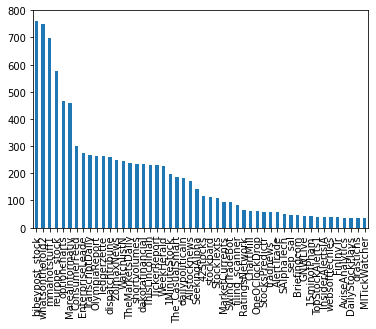

In [4]:
stocker_bot['source'].value_counts().head(50).plot.bar()

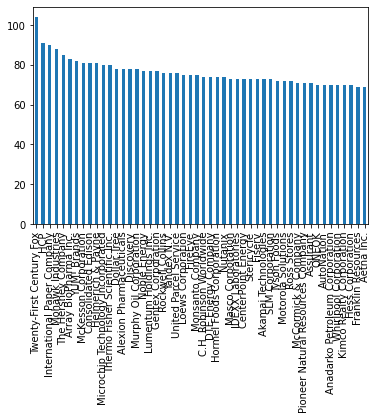

In [5]:
stocker_bot['company_names'].value_counts().head(50).plot.bar()

## Sentiment analysis

In [10]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
stocker_bot[['neg', 'neu', 'pos', 'compound']] = stocker_bot['text'].apply(sid.polarity_scores).apply(pd.Series)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
stocker_bot[['text', 'neg', 'neu', 'pos', 'compound']].sort_values('pos', ascending=False)

,text,neg,neu,pos,compound
14462,$TVIX wow,0.000,0.208,0.792,0.5859
20743,$aaoi wow,0.000,0.208,0.792,0.5859
22539,$ADBE strong,0.000,0.233,0.767,0.5106
21231,$FDX nice,0.000,0.263,0.737,0.4215
20844,$TVIX wo wow,0.000,0.345,0.655,0.5859
...,...,...,...,...,...
10995,RT @Briefingcom: Upcoming #earnings reports ht...,0.000,1.000,0.000,0.0000
10994,Big bullish unusual option activity detected: ...,0.000,1.000,0.000,0.0000
10993,Illumina Inc $ILMN: Institutional Investor Sen...,0.000,1.000,0.000,0.0000
10991,why did $srcl fall out of bed the last few hou...,0.000,1.000,0.000,0.0000


In [39]:
row = random.randint(0, len(stocker_bot))

print(stocker_bot.iloc[row], stocker_bot.iloc[row]['text'])


id                                             1019668539085545500
text             Downtick  $GGP 3312500 shares @ $20.38 [11:56:...
timestamp                                2018-07-18 19:41:38+00:00
source                                                   richcash8
symbols                                                        GGP
company_names                                             GGP Inc.
url                                                            NaN
verified                                                     False
neg                                                            0.0
neu                                                          0.784
pos                                                          0.216
compound                                                     0.296
Name: 24990, dtype: object Downtick  $GGP 3312500 shares @ $20.38 [11:56:51]  Target 8 - 4.31 % dividend
